# Practical Deep Learning for Coders
## Lesson 1 



https://course.fast.ai/

37 types of cat and dog breeds to classify

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import os
cwd = os.getcwd()
print(cwd)
path_img = Path('/kaggle/input/the-oxfordiiit-pet-dataset/images/'); 

/kaggle/working


In [4]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/kaggle/input/the-oxfordiiit-pet-dataset/images/american_bulldog_74.jpg'),
 PosixPath('/kaggle/input/the-oxfordiiit-pet-dataset/images/pug_188.jpg'),
 PosixPath('/kaggle/input/the-oxfordiiit-pet-dataset/images/japanese_chin_180.jpg'),
 PosixPath('/kaggle/input/the-oxfordiiit-pet-dataset/images/samoyed_15.jpg'),
 PosixPath('/kaggle/input/the-oxfordiiit-pet-dataset/images/Ragdoll_149.jpg')]

In [5]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [6]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,pug,japanese_chin,Birman,Birman
Path: /kaggle/input/the-oxfordiiit-pet-dataset/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,miniature_pinscher,yorkshire_terrier,scottish_terrier,Maine_Coon
Path: /kaggle/input/the-oxfordiiit-pet-dataset/images;

Test: None

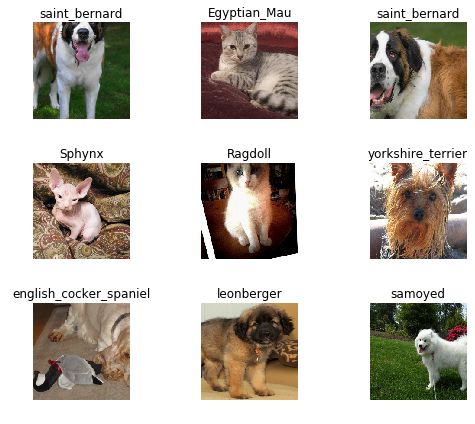

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 153MB/s] 


What did we just download? Imagenet Pretrained weights. So we don't start with a model that knows nothing at all. 

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.370909,0.337602,0.112314,01:31
1,0.593297,0.287296,0.091340,01:27
2,0.370083,0.234006,0.069689,01:27
3,0.281277,0.232227,0.071042,01:27


In [11]:
learn.model_dir='/kaggle/working/'

In [12]:
learn.save('stage-1')

## Results

In [13]:
interpr = ClassificationInterpretation.from_learner(learn)

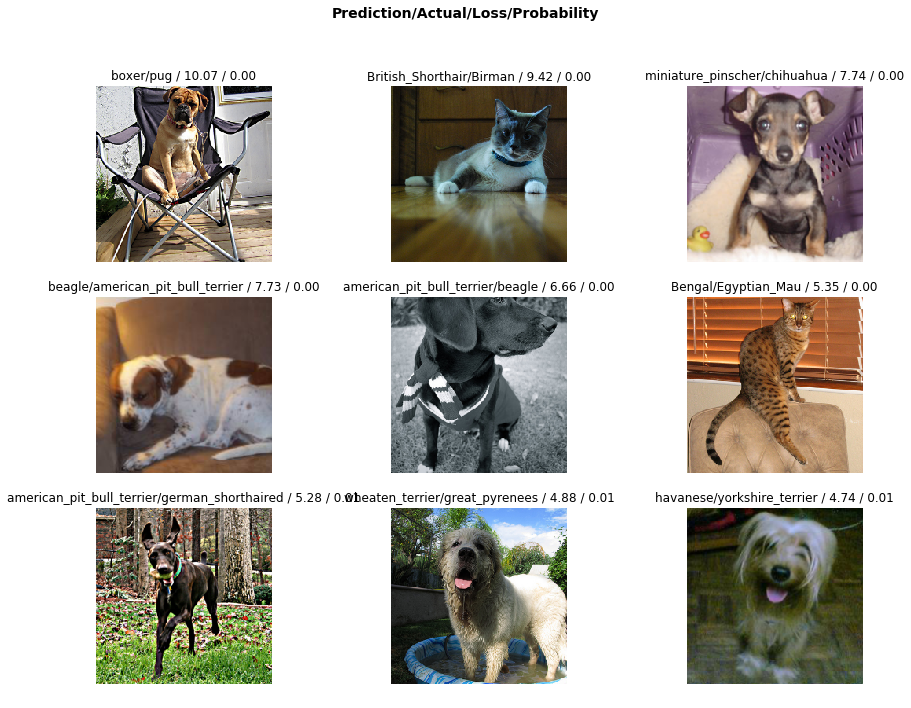

In [14]:
interpr.plot_top_losses(9, figsize=(15, 11))

Prediciton, Actual, Loss, Probability of Actual class show on lables above 

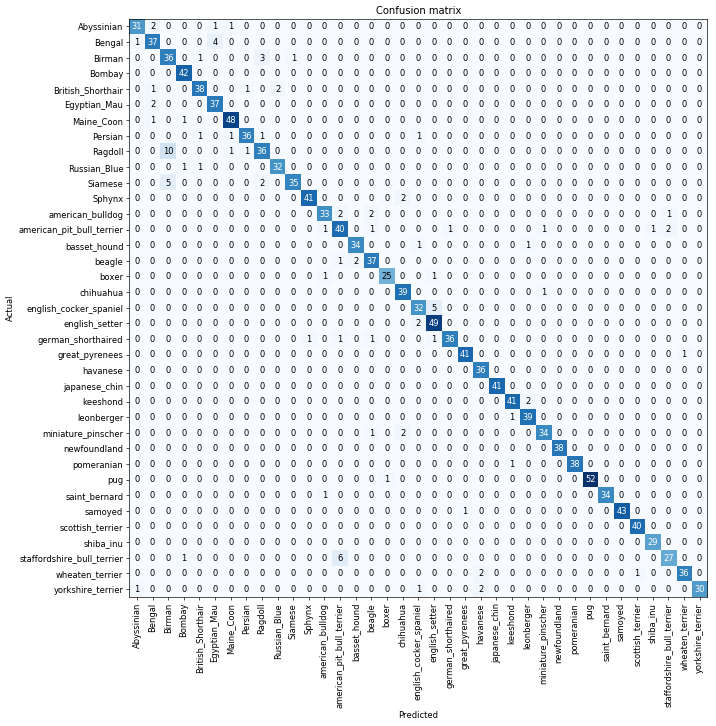

In [15]:
interpr.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interpr.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Siamese', 'Birman', 5),
 ('english_cocker_spaniel', 'english_setter', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 3),
 ('Abyssinian', 'Bengal', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Siamese', 'Ragdoll', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'beagle', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'leonberger', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('wheaten_terrier', 'havanese', 2),
 ('yorkshire_terrier', 'havanese', 2)]